In [1]:
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
np.random.seed(69)

In [2]:
def validation(Y):
    Yt_bar=[]
    for Yt in Y:
        Yt_bar.append(np.mean(Yt))
    y_bar=np.mean(Yt_bar)
    ST=0
    vT=len(Y)-1
    for t in range(len(Y)):
        ST+=(len(Y[t])*((Yt_bar[t]-y_bar)**2))
    SD=0
    vD=-1
    for t in range(len(Y)):
        for i in range(len(Y[t])):
            SD+=(Y[t][i]-y_bar)**2
        vD+=len(Y[t])
    SR=0
    vR=0
    for t in range(len(Y)):
        for i in range(len(Y[t])):
            SR+=(Y[t][i]-Yt_bar[t])**2
        vR+=len(Y[t])-1
    
    if not(round(SD,5)==round(SR,5)+round(ST,5)):
        return ("Error in SOS")
    elif not(vD==vT+vR):
        return ("Error in DOF")
    
    SR2=round(SR/vR,10)
    ST2=round(ST/vT,10)
    SD2=round(SD/vD,10)

    F_ratio=round(ST2/SR2,4)
    data = [["Between Treatments", 'ST = '+str(ST),'vT = '+str(vT) , 'ST2 = '+str(ST2),"ST2/SR2 = "+str(F_ratio)],
            ["Within Treatments", 'SR = '+str(SR),'vR = '+str(vR) , 'SR2 = '+str(SR2),None],
            ["Total about Grand Average", 'SD = '+str(SD),'vD = '+str(vD) , 'SD2 = '+str(SD2),None]]
    print (tabulate(data, headers=["Source of Variation", "Sum of Squares", "Degrees of Freedom", "Mean Square","F-Ratio"]))
    
    n_bar=(vD+1)/(vT+1)
    s=(SR2/n_bar)**0.5
    for i in range(len(Yt_bar)):
        plt.plot(Yt_bar[i], np.zeros_like(Yt_bar[i]), 'x',label="Yt_bar"+str(i+1),c=np.random.rand(3,))
    sig1=np.arange(np.mean(Yt_bar)-s,np.mean(Yt_bar)+s,0.01)
    sig2=np.arange(np.mean(Yt_bar)-2*s,np.mean(Yt_bar)+2*s,0.01)
    plt.plot(sig1,np.zeros_like(sig1)+0.25,'red',label="1-sigma band")
    plt.plot(sig2,np.zeros_like(sig2)-0.25,'green',label="2-sigma band")
    plt.legend(loc="upper left")
    plt.ylim(-2, 2)
    plt.show()
    Y_res=Y
    Y_all=[]
    figure, axis = plt.subplots(nrows=len(Y_res)+1)
    for i in range(len(Y_res)):
        for j in range(len(Y_res[i])):
            Y_res[i][j]-=Yt_bar[i]
            Y_all.append(Y_res[i][j])
        
        axis[i].scatter(Y_res[i], np.zeros_like(Y_res[i]),alpha=.25,s=100)
        axis[i].set_title("Residual set: "+str(i+1))
        
    axis[len(Y_res)].scatter(Y_all, np.zeros_like(Y_all),alpha=.25,s=100)
    axis[len(Y_res)].set_title("All residuals: ")
    figure.tight_layout()
    plt.show()
    
    for i in range(len(Y_res)):
        plt.plot(np.zeros_like(Y_res[i])+Yt_bar[i], Y_res[i], 'x',label="Y_res"+str(i+1))
    plt.title("Residuals vs Estimates")
    plt.xlabel("Estimates")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()

In [3]:
y1=np.random.randint(140,180,100) #actual values sample
yhat1=np.random.randint(100,190,100) # random values sample,high error in individual measurements
yhat2=y1+np.random.randint(-2,3,100) # +-2 error sample per measurement
Y=np.array([y1,yhat1,yhat2])
Y

array([[151, 149, 166, 160, 162, 149, 173, 178, 172, 164, 152, 177, 151,
        143, 156, 179, 164, 142, 175, 179, 164, 166, 151, 163, 175, 162,
        154, 161, 146, 145, 152, 154, 154, 167, 156, 169, 159, 151, 154,
        158, 177, 164, 154, 169, 140, 159, 167, 140, 172, 147, 144, 149,
        149, 158, 169, 161, 175, 141, 169, 152, 146, 147, 141, 145, 165,
        149, 140, 177, 169, 156, 164, 168, 179, 142, 167, 179, 166, 167,
        141, 140, 168, 179, 170, 140, 154, 155, 142, 154, 165, 153, 152,
        167, 163, 159, 140, 173, 157, 166, 154, 175],
       [127, 174, 169, 103, 130, 128, 140, 156, 138, 128, 124, 169, 167,
        137, 124, 134, 109, 151, 125, 146, 117, 104, 157, 134, 109, 186,
        112, 184, 129, 173, 143, 100, 174, 171, 107, 141, 161, 165, 141,
        147, 147, 162, 161, 150, 185, 135, 185, 101, 122, 149, 126, 165,
        103, 120, 178, 143, 163, 132, 180, 131, 171, 167, 121, 152, 101,
        157, 135, 147, 128, 145, 140, 116, 155, 119, 100, 154, 168, 14

Source of Variation        Sum of Squares           Degrees of Freedom    Mean Square            F-Ratio
-------------------------  -----------------------  --------------------  ---------------------  -----------------
Between Treatments         ST = 18096.486666666657  vT = 2                ST2 = 9048.2433333333  ST2/SR2 = 31.2023
Within Treatments          SR = 86126.05999999992   vR = 297              SR2 = 289.9867340067
Total about Grand Average  SD = 104222.54666666668  vD = 299              SD2 = 348.5703901895


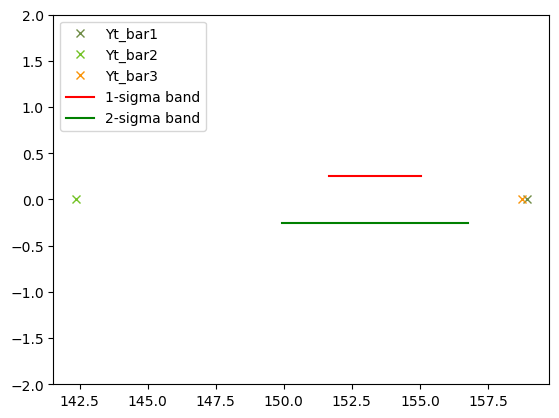

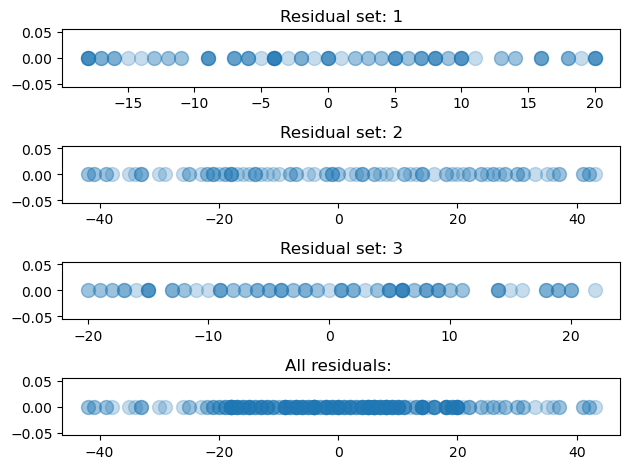

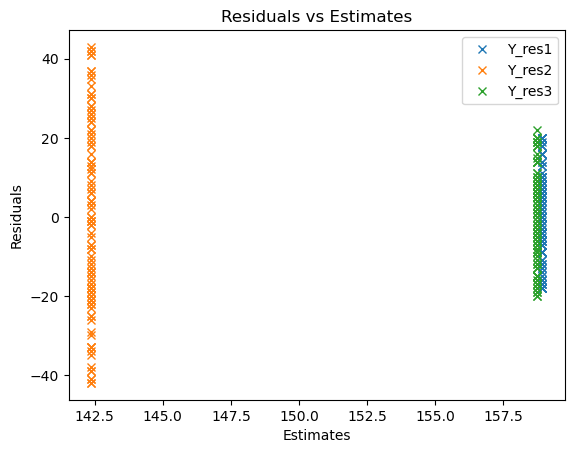

In [4]:
validation(Y)